In [18]:
import requests
import random
import logging
import time
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, chi2_contingency
import os
import io

DATA_DIR_RAW = os.path.join("..", "..", "data", "raw")
DATA_DIR_PROCESSED = os.path.join("..", "..", "data", "processed")

# ü™µ Logging setup
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

In [3]:
OUTPUT_ACE_CBD_2024 = os.path.join(DATA_DIR_RAW, "ACE_CBD_exempt_violations_2024.csv")
ACE_CBD_exempt_violations_2024 = pd.read_csv(OUTPUT_ACE_CBD_2024)
ACE_CBD_exempt_violations_2024.head()

violation_id                                         vehicle_id  \
0     452517324  3fbfaed0785d8e5a1c9ecc32b7e493e6ae07261ba9115e...   
1     452517306  ef6afb15ef2f996ef24568513e60cc25a1eb72d0b7c525...   
2     452517258  df1f37b3d595dc65291f25196d9e957b006e9472660bbb...   
3     452517238  df1f37b3d595dc65291f25196d9e957b006e9472660bbb...   
4     452461536  3f4f9c3891611af34c2290a19eb7c2b7cc62f8c66bbefd...   

      first_occurrence          last_occurrence              violation_status  \
0  2024-12-31 10:54:43  2024-12-31T11:08:23.000  EXEMPT - COMMERCIAL UNDER 20   
1  2024-12-31 08:31:27  2024-12-31T08:35:31.000  EXEMPT - COMMERCIAL UNDER 20   
2  2024-12-31 15:59:11  2024-12-31T16:48:22.000    EXEMPT - EMERGENCY VEHICLE   
3  2024-12-31 15:59:11  2024-12-31T16:11:37.000    EXEMPT - EMERGENCY VEHICLE   
4  2024-12-31 10:04:58  2024-12-31T10:32:05.000    EXEMPT - EMERGENCY VEHICLE   

         violation_type bus_route_id  violation_latitude  violation_longitude  \
0  MOBILE DOUBLE PARKED         M101           40.832263           -73.942474   
1  MOBILE DOUBLE PARKED         M101           40.795071           -73.942076   
2  MOBILE DOUBLE PARKED         M101           40.842348           -73.935127   
3  MOBILE DOUBLE PARKED         M101           40.842344           -73.935110   
4  MOBILE DOUBLE PARKED         M101           40.842417           -73.935064   

   stop_id              stop_name  bus_stop_latitude  bus_stop_longitude  \
0   402526  AMSTERDAM AV/W 155 ST          40.831683          -73.942827   
1   402677           3 AV/E 37 ST          40.747988          -73.976370   
2   402740  AMSTERDAM AV/W 171 ST          40.841978          -73.935267   
3   402740  AMSTERDAM AV/W 171 ST          40.841978          -73.935267   
4   402740  AMSTERDAM AV/W 171 ST          40.841978          -73.935267   

         violation_georeference         bus_stop_georeference route_id  
0  POINT (-73.942474 40.832263)  POINT (-73.942827 40.831683)     M101  
1  POINT (-73.942076 40.795071)   POINT (-73.97637 40.747988)     M101  
2  POINT (-73.935127 40.842348)  POINT (-73.935267 40.841978)     M101  
3   POINT (-73.93511 40.842344)  POINT (-73.935267 40.841978)     M101  
4  POINT (-73.935064 40.842417)  POINT (-73.935267 40.841978)     M101

In [ ]:
OUTPUT_events = os.path.join(DATA_DIR_RAW, "events_manhattan_2024.csv")
events_manhattan_2024 = pd.read_csv(OUTPUT_events)
events_manhattan_2024.head()

event_types = [
    "Block Party",
    "Athletic",
    "Athletic Race / Tour",
    "Street Event",
    "Shooting Permit",
    "Sport-Youth"
]

events_manhattan_2024 = events_manhattan_2024[
    (events_manhattan_2024["event_type"].isin(event_types)) |
    (events_manhattan_2024["street_closure_type"].notna())
]

print(f"Number of filtered events: {len(events_manhattan_2024)}")
events_manhattan_2024


Number of filtered events: 69525


event_id                                         event_name  \
7          783041                   Lower East Side Farmstand Friday   
8          759245                           HHFM Lenox Avenue Market   
23         751978                            St. Anthony Flea Market   
52         702878           Street Health Outreach  Wellness Program   
63         785210                                    Broadway Rhythm   
...           ...                                                ...   
1419263    823921                         Mobile X RAY, testing unit   
1419264    812652  Fifth Avenue Association Annual Holiday Decor ...   
1419267    823921                         Mobile X RAY, testing unit   
1419268    818955      Holidays on Madison Holiday Shopping Displays   
1419270    818955      Holidays on Madison Holiday Shopping Displays   

                 start_date_time            end_date_time  \
7        2024-09-20T08:00:00.000  2024-09-20T15:30:00.000   
8        2024-09-21T08:00:00.000  2024-09-21T15:00:00.000   
23       2024-09-21T09:00:00.000  2024-09-21T19:00:00.000   
52       2024-09-13T10:00:00.000  2024-09-13T18:00:00.000   
63       2024-09-25T11:00:00.000  2024-09-25T15:00:00.000   
...                          ...                      ...   
1419263  2024-12-12T00:00:00.000  2025-01-12T23:30:00.000   
1419264  2024-11-21T10:00:00.000  2025-01-06T20:00:00.000   
1419267  2024-12-13T00:00:00.000  2025-01-12T23:30:00.000   
1419268  2024-11-26T10:00:00.000  2025-01-24T18:00:00.000   
1419270  2024-11-26T10:00:00.000  2025-01-24T18:00:00.000   

                          event_agency      event_type event_borough  \
7        Street Activity Permit Office  Farmers Market     Manhattan   
8        Street Activity Permit Office  Farmers Market     Manhattan   
23       Street Activity Permit Office   Sidewalk Sale     Manhattan   
52       Street Activity Permit Office    Street Event     Manhattan   
63       Street Activity Permit Office     Plaza Event     Manhattan   
...                                ...             ...           ...   
1419263  Street Activity Permit Office    Street Event     Manhattan   
1419264  Street Activity Permit Office    Street Event     Manhattan   
1419267  Street Activity Permit Office    Street Event     Manhattan   
1419268  Street Activity Permit Office    Street Event     Manhattan   
1419270  Street Activity Permit Office    Street Event     Manhattan   

                                            event_location event_street_side  \
7        GRAND STREET between WILLETT STREET and PITT S...             North   
8        LENOX AVENUE between WEST  117 STREET and WEST...              West   
23       WEST HOUSTON STREET between THOMPSON STREET an...              West   
52       AMSTERDAM AVENUE between WEST  180 STREET and ...              East   
63       39/40 Broadway Pedestrian Plaza (Broadway Blvd...              Full   
...                                                    ...               ...   
1419263  EAST   45 STREET between VANDERBILT AVENUE and...             North   
1419264  FIFTH AVENUE between EAST   47 STREET and EAST...              Both   
1419267  EAST   45 STREET between VANDERBILT AVENUE and...             North   
1419268  MADISON AVENUE between EAST   61 STREET and EA...              West   
1419270  MADISON AVENUE between EAST   61 STREET and EA...              West   

                    street_closure_type community_board police_precinct  
7        Sidewalk and Curb Lane Closure              3,              7,  
8        Sidewalk and Curb Lane Closure             10,             28,  
23       Sidewalk and Curb Lane Closure              2,           1, 6,  
52                       Curb Lane Only             12,             34,  
63                     Pedestrian Plaza              5,             14,  
...                                 ...             ...             ...  
1419263        Partial Sidewalk Closure              5,         14,

### Insights

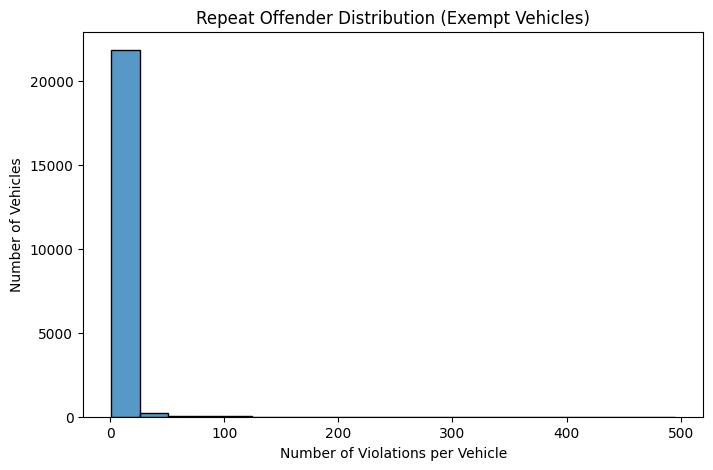

count    22232.000000
mean         3.394881
std         10.479276
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        495.000000
Name: violation_count, dtype: float64


In [ ]:
# Q: Do exempt vehicles repeatedly commit violations?

repeat_offenders = ACE_CBD_exempt_violations_2024.groupby("vehicle_id")["violation_id"].count().reset_index(name="violation_count")

plt.figure(figsize=(8,5))
sns.histplot(repeat_offenders["violation_count"], bins=20, kde=False)
plt.xlabel("Number of Violations per Vehicle")
plt.ylabel("Number of Vehicles")
plt.title("Repeat Offender Distribution (Exempt Vehicles)")
plt.show()

print(repeat_offenders["violation_count"].describe())


Business insight:
- If a small % of vehicles account for most violations ‚Üí some businesses abuse the exemption system.
- If most are 1-time offenders ‚Üí exemptions might serve occasional, legitimate needs.

                   stop_name  violation_count
24              2 AV/E 23 ST             5628
271  MADISON ST/CATHERINE ST             3342
113    AMSTERDAM AV/W 175 ST             2226
8               1 AV/E 28 ST             2051
110    AMSTERDAM AV/W 171 ST             1748
31              2 AV/E 78 ST             1716
272      PEARL ST/BEEKMAN ST             1594
20             2 AV/E 106 ST             1560
22             2 AV/E 125 ST             1560
273       PEARL ST/FULTON ST             1440


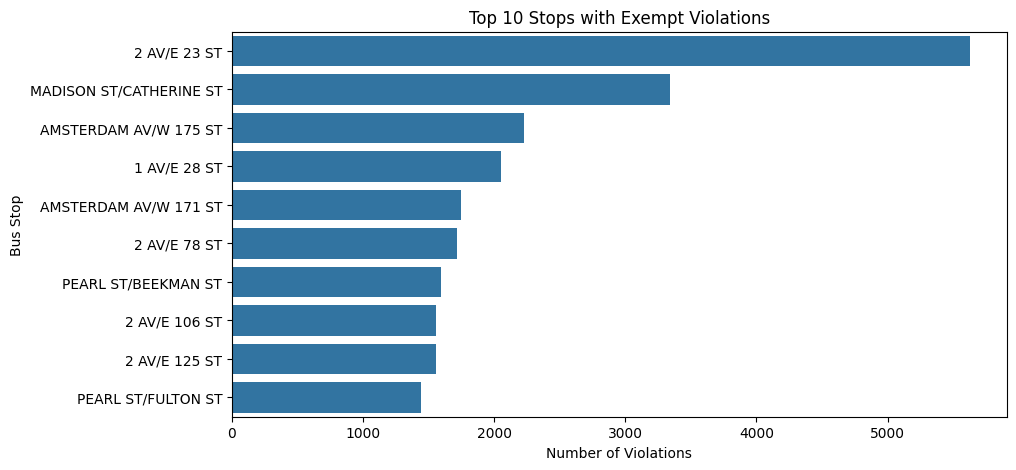

In [ ]:
# Q: Where are exempt vehicles frequently in violation?

stop_hotspots = ACE_CBD_exempt_violations_2024.groupby("stop_name")["violation_id"].count().reset_index(name="violation_count")
stop_hotspots = stop_hotspots.sort_values("violation_count", ascending=False).head(10)
print(stop_hotspots)

plt.figure(figsize=(10,5))
sns.barplot(data=stop_hotspots, x="violation_count", y="stop_name")
plt.xlabel("Number of Violations")
plt.ylabel("Bus Stop")
plt.title("Top 10 Stops with Exempt Violations")
plt.show()


Business insight:
- These hotspots may be congestion points where business deliveries conflict with buses.
- City DOT can consider targeted policies: designated delivery zones or stricter monitoring.

In [ ]:
# Q: Are some bus routes disproportionately impacted?

route_hotspots = ACE_CBD_exempt_violations_2024.groupby("bus_route_id")["violation_id"].count().reset_index(name="violation_count")
route_hotspots = route_hotspots.sort_values("violation_count", ascending=False)
print(route_hotspots.head(10))

  bus_route_id  violation_count
1         M15+            42037
0         M101            25607
3         M34+             5162
2         M23+             2670


Business insight:
- High-impact routes = high passenger volume routes being slowed by exempt vehicles.
- Can guide transit enforcement priorities.

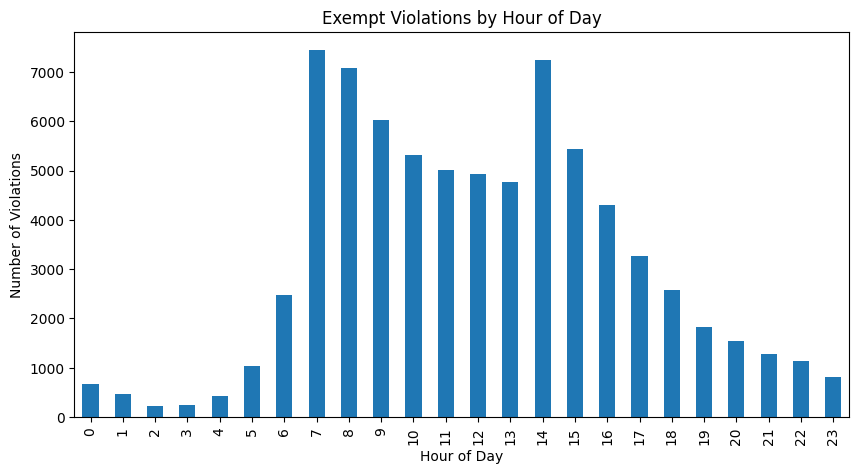

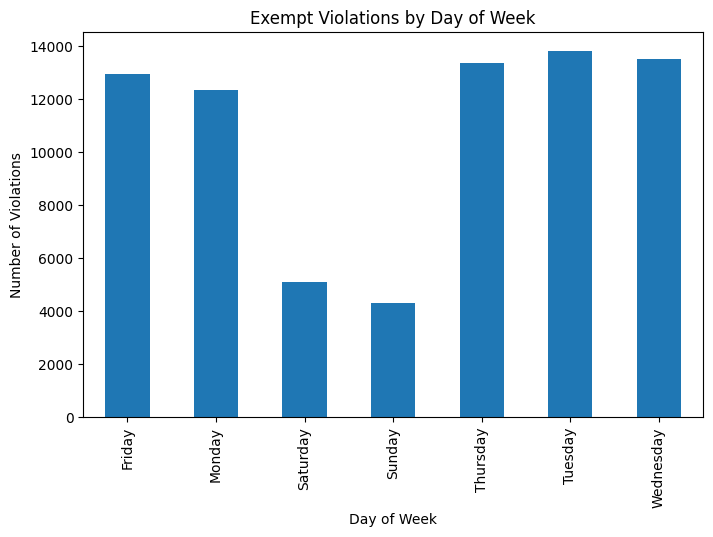

In [ ]:
# Q: When do exempt violations occur most often?

ACE_CBD_exempt_violations_2024["first_occurrence"] = pd.to_datetime(ACE_CBD_exempt_violations_2024["first_occurrence"])

ACE_CBD_exempt_violations_2024["hour"] = ACE_CBD_exempt_violations_2024["first_occurrence"].dt.hour
hourly_counts = ACE_CBD_exempt_violations_2024.groupby("hour")["violation_id"].count()

plt.figure(figsize=(10,5))
hourly_counts.plot(kind="bar")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Violations")
plt.title("Exempt Violations by Hour of Day")
plt.show()

ACE_CBD_exempt_violations_2024["day_of_week"] = ACE_CBD_exempt_violations_2024["first_occurrence"].dt.day_name()
dow_counts = ACE_CBD_exempt_violations_2024.groupby("day_of_week")["violation_id"].count()

plt.figure(figsize=(8,5))
dow_counts.plot(kind="bar")
plt.xlabel("Day of Week")
plt.ylabel("Number of Violations")
plt.title("Exempt Violations by Day of Week")
plt.show()


### Statistical Tests

In [23]:
OUTPUT_ACE_NON_CBD_2024 = os.path.join(DATA_DIR_RAW, "ACE_CBD_non_exempt_violations_2024.csv")
ACE_CBD_non_exempt_violations_2024 = pd.read_csv(OUTPUT_ACE_NON_CBD_2024)
ACE_CBD_non_exempt_violations_2024.head()

violation_id                                         vehicle_id  \
0     466434011  0793aa5cb07e4fe2f0b708322397596b572bb8bb20ce57...   
1     466433995  f6e5765ff6839c918516f8590ff7d16f4c0cd727a83b70...   
2     466433863  b3608c6757c16d1433d98cca64bf29a7eeacd874c61281...   
3     466433834  c97d07bd6e7c1756a5160064e8fcf1ecd83f2d41edbb3c...   
4     466418716  575ad6f7c9a7153641b82d41f83f446ea7c64398a299cb...   

      first_occurrence          last_occurrence  violation_status  \
0  2024-12-31 10:54:43  2025-04-10T10:41:54.000  VIOLATION ISSUED   
1  2024-12-31 08:31:27  2025-04-10T10:41:12.000  VIOLATION ISSUED   
2  2024-12-31 15:59:11  2025-04-10T10:22:13.000  VIOLATION ISSUED   
3  2024-12-31 15:59:11  2025-04-10T10:20:34.000  VIOLATION ISSUED   
4  2024-12-31 10:04:58  2025-04-09T12:42:33.000  VIOLATION ISSUED   

    violation_type bus_route_id  violation_latitude  violation_longitude  \
0  MOBILE BUS STOP         M15+           40.800044           -73.932396   
1  MOBILE BUS STOP         M101           40.776321           -73.955804   
2  MOBILE BUS STOP         M15+           40.711928           -73.998177   
3  MOBILE BUS STOP         M34+           40.742672           -73.977489   
4  MOBILE BUS STOP         M15+           40.771039           -73.953578   

   stop_id            stop_name  bus_stop_latitude  bus_stop_longitude  \
0   401727        1 AV/E 116 ST          40.796303          -73.935089   
1   403433         3 AV/E 79 ST          40.774605          -73.956970   
2   403601  PEARL ST/BEEKMAN ST          40.708264          -74.003099   
3   401824     E 34 ST /PARK AV          40.746929          -73.981102   
4   401707         1 AV/E 67 ST          40.764870          -73.958109   

         violation_georeference         bus_stop_georeference route_id  
0  POINT (-73.932396 40.800044)  POINT (-73.935089 40.796303)     M15+  
1  POINT (-73.955804 40.776321)   POINT (-73.95697 40.774605)     M101  
2  POINT (-73.998177 40.711928)  POINT (-74.003099 40.708264)     M15+  
3  POINT (-73.977489 40.742672)  POINT (-73.981102 40.746929)     M34+  
4  POINT (-73.953578 40.771039)   POINT (-73.958109 40.76487)     M15+

In [36]:
# Q: Are exempt vehicles statistically more likely to be repeat offenders?

exempt_counts = ACE_CBD_exempt_violations_2024.groupby("vehicle_id")["violation_id"].count().reset_index(name="violation_count")
non_exempt_counts = ACE_CBD_non_exempt_violations_2024.groupby("vehicle_id")["violation_id"].count().reset_index(name="violation_count")

In [ ]:
# Statistical test comparing two distributions that may not be normally distributed.
# Null hypothesis (H‚ÇÄ): The distributions of exempt vs. non-exempt violation counts are the same.
# If p < 0.05, you reject H‚ÇÄ ‚Üí meaning exempt vehicles‚Äô violation counts are statistically different.

from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(exempt_counts["violation_count"], 
                       non_exempt_counts["violation_count"], 
                       alternative="two-sided")

print("Mann-Whitney U test statistic:", stat)
print("p-value:", p)

In [ ]:
# Calculates the proportion of vehicles that are repeat offenders (more than 1 violation)

exempt_repeat = (exempt_counts["violation_count"] > 1).mean()
non_exempt_repeat = (non_exempt_counts["violation_count"] > 1).mean()

print("Exempt repeat offender rate:", round(exempt_repeat*100,2), "%")
print("Non-exempt repeat offender rate:", round(non_exempt_repeat*100,2), "%")

Exempt repeat offender rate: 40.73 %
Non-exempt repeat offender rate: 21.14 %


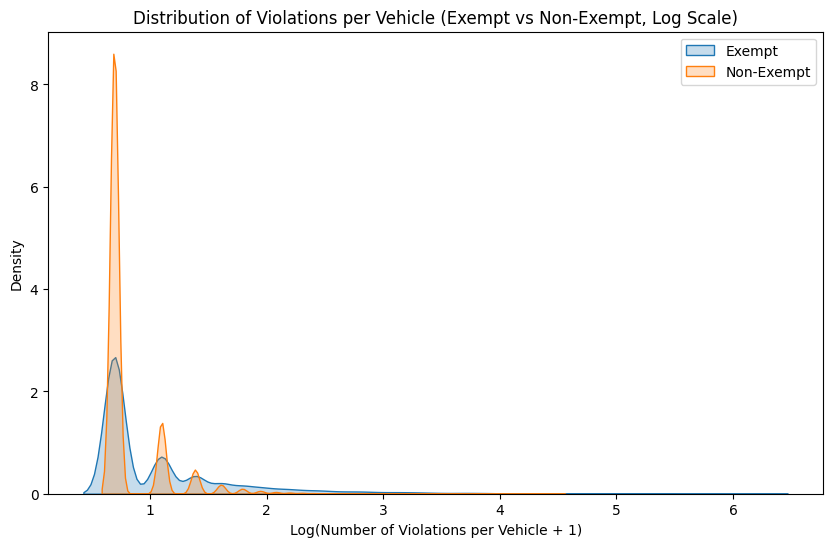

C:\Users\aisha\AppData\Local\Temp\ipykernel_16784\1098702203.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Exempt", "Non-Exempt"],


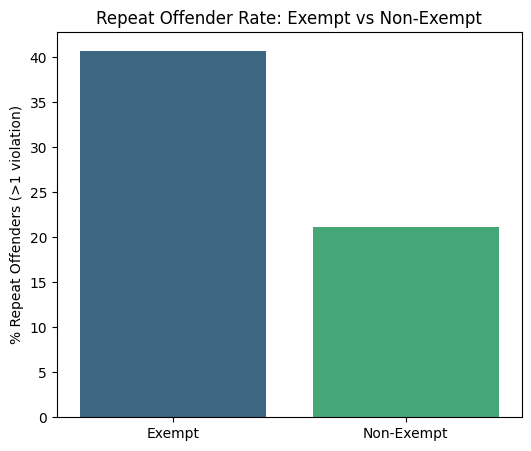

In [ ]:
# 1. Repeat Offenders (Distribution + Bar Chart)

import matplotlib.pyplot as plt
import seaborn as sns

exempt_counts = ACE_CBD_exempt_violations_2024.groupby("vehicle_id")["violation_id"].count().reset_index(name="violation_count")
non_exempt_counts = ACE_CBD_non_exempt_violations_2024.groupby("vehicle_id")["violation_id"].count().reset_index(name="violation_count")

# # KDE Plot (Distribution of violations per vehicle)
# plt.figure(figsize=(10,6))
# sns.kdeplot(exempt_counts["violation_count"], label="Exempt", fill=True)
# sns.kdeplot(non_exempt_counts["violation_count"], label="Non-Exempt", fill=True)
# plt.xlabel("Number of Violations per Vehicle")
# plt.ylabel("Density")
# plt.title("Distribution of Violations per Vehicle (Exempt vs Non-Exempt)")
# plt.legend()
# plt.show()

plt.figure(figsize=(10,6))
sns.kdeplot(np.log1p(exempt_counts["violation_count"]), label="Exempt", fill=True)
sns.kdeplot(np.log1p(non_exempt_counts["violation_count"]), label="Non-Exempt", fill=True)
plt.xlabel("Log(Number of Violations per Vehicle + 1)")
plt.ylabel("Density")
plt.title("Distribution of Violations per Vehicle (Exempt vs Non-Exempt, Log Scale)")
plt.legend()
plt.show()


# Bar chart of repeat offender rates
exempt_repeat = (exempt_counts["violation_count"] > 1).mean()
non_exempt_repeat = (non_exempt_counts["violation_count"] > 1).mean()

plt.figure(figsize=(6,5))
sns.barplot(x=["Exempt", "Non-Exempt"], 
            y=[exempt_repeat*100, non_exempt_repeat*100],
            palette="viridis")
plt.ylabel("% Repeat Offenders (>1 violation)")
plt.title("Repeat Offender Rate: Exempt vs Non-Exempt")
plt.show()


In [ ]:
# Builds a contingency table of stops √ó violation types for exempt vehicles only.
# Runs a chi-square test to see if certain violation types are disproportionately common at certain stops.
# If p < 0.05, exempt violations are not randomly distributed ‚Äî specific stop/violation-type combos dominate.

contingency = pd.crosstab(ACE_CBD_exempt_violations_2024["stop_id"], ACE_CBD_exempt_violations_2024["violation_type"])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square test p-value:", p)


Chi-square test p-value: 0.0


In [ ]:
# Counts total violations at each bus stop for both groups.
# Creates a contingency table of stops √ó (exempt vs non-exempt).
# Runs a chi-square test to check if exempt and non-exempt vehicles cluster differently across stops.
# If p < 0.05, then exempt and non-exempt violations occur in different hotspots.

exempt_stop = ACE_CBD_exempt_violations_2024.groupby("stop_id")["violation_id"].count()
non_exempt_stop = ACE_CBD_non_exempt_violations_2024.groupby("stop_id")["violation_id"].count()

stop_compare = pd.DataFrame({
    "Exempt": exempt_stop,
    "Non_Exempt": non_exempt_stop
}).fillna(0)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(stop_compare.T)
print("Chi-square test statistic:", chi2)
print("p-value:", p)


Chi-square test statistic: 34596.61416282359
p-value: 0.0


Mann-Whitney U Test (repeat offenders)
- p ‚âà 0 ‚Üí the distributions of exempt vs. non-exempt violations per vehicle are very different.
- Exempt vehicles and non-exempt vehicles do not behave the same way when it comes to repeat offending.

Chi-Square (exempt stop √ó violation type)
- p ‚âà 0 ‚Üí violation types are not evenly spread across stops for exempt vehicles.
- Certain violation types (e.g., mobile double parked) dominate specific stops.

Chi-Square (exempt vs non-exempt across stops)
- p ‚âà 0 ‚Üí exempt and non-exempt vehicles cluster in different hotspots.
- Suggests exempt vehicles may be linked to business-heavy areas (delivery, logistics), while non-exempt are spread more randomly.


**Business Interpretation**
- Abuse or concentration? A few exempt vehicles may be committing many violations (repeat offenders), taking advantage of exemptions.
- Targeted congestion points: Exempt violations are geographically concentrated at specific stops/routes. These may overlap with business districts where deliveries are common.
- Different behavior vs. non-exempt: Non-exempt violations are spread differently, reinforcing that exemptions are tied to business activity patterns rather than random traffic issues.


We now have statistical backing for 3 claims:
1. Exempt vehicles are statistically more likely to be repeat offenders.
2. Exempt violations cluster by stop & violation type (not random).
3. Exempt hotspots are different from non-exempt hotspots.
This is strong evidence for policymakers or transit planners ‚Äî exemptions may be working for business needs, but they also create systematic friction at particular bus stops and routes.

In [ ]:
exempt_counts = ACE_CBD_exempt_violations_2024.groupby("vehicle_id")["violation_id"].count().values
non_exempt_counts = ACE_CBD_non_exempt_violations_2024.groupby("vehicle_id")["violation_id"].count().values

def cliffs_delta(x, y):
    n, m = len(x), len(y)
    greater = sum([1 for a in x for b in y if a > b])
    less = sum([1 for a in x for b in y if a < b])
    return (greater - less) / (n * m)

delta = cliffs_delta(exempt_counts, non_exempt_counts)
print("Cliff's Delta:", delta)


Cliff's Delta: 0.2196858000255507


Exempt vehicles show a statistically significant higher rate of repeat violations compared to non-exempt vehicles (Mann‚ÄìWhitney U, p < 0.001). The effect size is small-to-moderate (Cliff‚Äôs Delta = 0.22), suggesting exempt vehicles are somewhat more likely to repeatedly offend, though the difference is not overwhelming.

In [ ]:
from scipy import stats
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k)-1)))

contingency_exempt = pd.crosstab(
    ACE_CBD_exempt_violations_2024["stop_id"], 
    ACE_CBD_exempt_violations_2024["violation_type"]
)
cramers_v_exempt = cramers_v(contingency_exempt)
print("Cram√©r‚Äôs V (exempt stops √ó violation type):", cramers_v_exempt)


Cram√©r‚Äôs V (exempt stops √ó violation type): 0.6299647821138383


There is a strong relationship between stop location and violation type among exempt vehicles (Cram√©r‚Äôs V = 0.63). This suggests exempt violations are systematically concentrated ‚Äî specific types of violations (e.g., double parking) occur disproportionately at certain stops, reflecting business activity patterns.

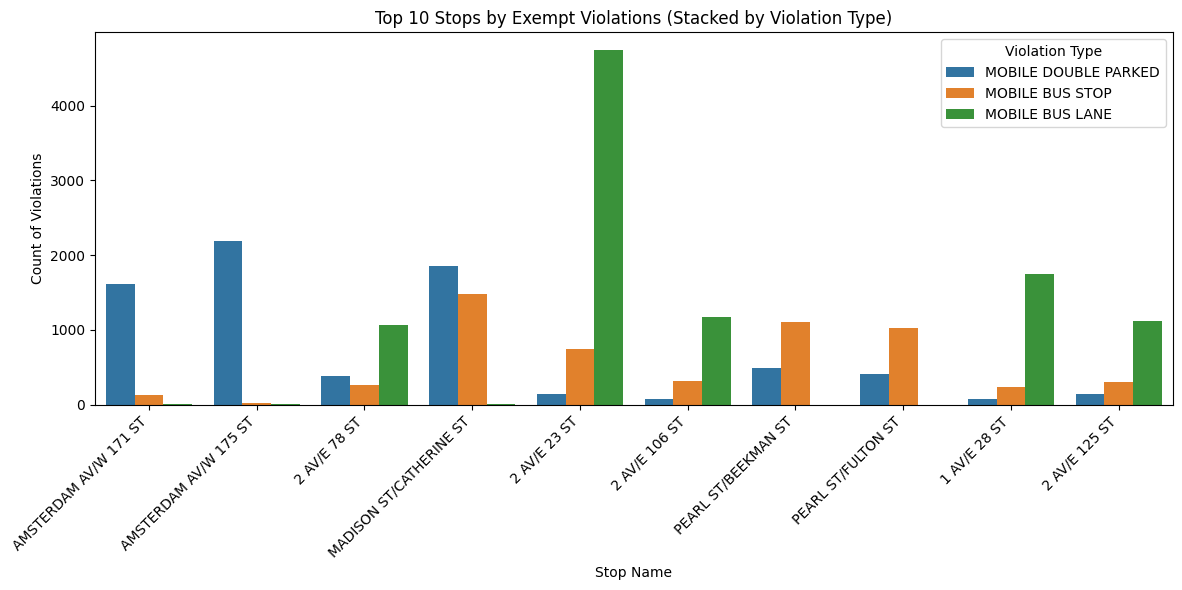

In [ ]:
# 2. Violation Type √ó Stop (Exempt Only)

top_stops = (ACE_CBD_exempt_violations_2024.groupby("stop_name")["violation_id"]
             .count()
             .sort_values(ascending=False)
             .head(10)
             .index)

top_exempt = ACE_CBD_exempt_violations_2024[ACE_CBD_exempt_violations_2024["stop_name"].isin(top_stops)]

plt.figure(figsize=(12,6))
sns.countplot(data=top_exempt, x="stop_name", hue="violation_type", palette="tab10")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Stops by Exempt Violations (Stacked by Violation Type)")
plt.xlabel("Stop Name")
plt.ylabel("Count of Violations")
plt.legend(title="Violation Type")
plt.tight_layout()
plt.show()


In [ ]:
ACE_CBD_exempt_violations_2024["exempt"] = "Exempt"
ACE_CBD_non_exempt_violations_2024["exempt"] = "Non-Exempt"

combined = pd.concat([
    ACE_CBD_exempt_violations_2024, 
    ACE_CBD_non_exempt_violations_2024
])

contingency_hotspots = pd.crosstab(combined["stop_id"], combined["exempt"])
cramers_v_hotspots = cramers_v(contingency_hotspots)
print("Cram√©r‚Äôs V (stops √ó exemption):", cramers_v_hotspots)


Cram√©r‚Äôs V (stops √ó exemption): 0.4787374071732015


Exempt and non-exempt vehicles show a moderate-to-strong difference in violation hotspots (Cram√©r‚Äôs V = 0.48). Exempt violations are concentrated in specific stops, suggesting these locations are strongly tied to business and delivery activity, whereas non-exempt violations are more evenly distributed.

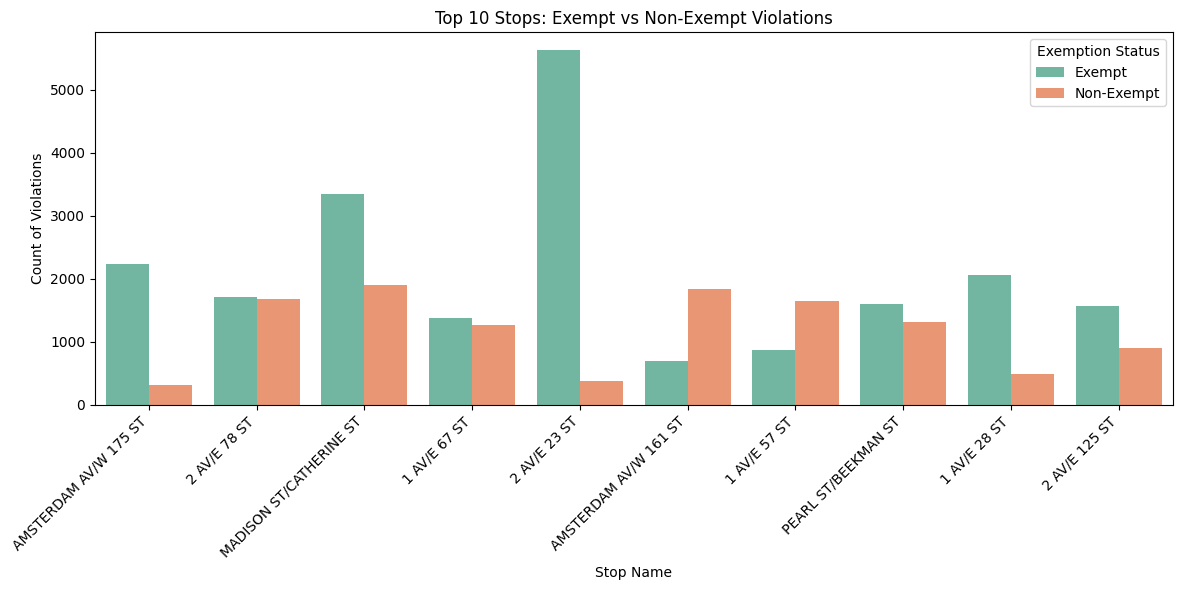

In [ ]:
# 3. Hotspot Comparison (Exempt vs Non-Exempt)

ACE_CBD_exempt_violations_2024["exemption"] = "Exempt"
ACE_CBD_non_exempt_violations_2024["exemption"] = "Non-Exempt"
combined = pd.concat([ACE_CBD_exempt_violations_2024, ACE_CBD_non_exempt_violations_2024])

top_stops_overall = (combined.groupby("stop_name")["violation_id"]
                     .count()
                     .sort_values(ascending=False)
                     .head(10)
                     .index)

top_combined = combined[combined["stop_name"].isin(top_stops_overall)]

plt.figure(figsize=(12,6))
sns.countplot(data=top_combined, x="stop_name", hue="exemption", palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Stops: Exempt vs Non-Exempt Violations")
plt.xlabel("Stop Name")
plt.ylabel("Count of Violations")
plt.legend(title="Exemption Status")
plt.tight_layout()
plt.show()


# Research Question

**For vehicles that are exempt from fines due to business reasons:**

1. Are they more likely to be repeat offenders compared to non-exempt vehicles?
2. Where are exempt vehicles frequently in violation, and are patterns different from non-exempt vehicles?

---

# Findings

### 1. **Repeat Offending**

* **Cliff‚Äôs Delta = 0.22 (small-to-moderate effect)**
* Exempt vehicles are **statistically more likely** to be repeat offenders compared to non-exempt vehicles.
* Suggests some exempt vehicles may be **taking advantage of their status** and repeatedly violating without consequence.

---

### 2. **Violation Type √ó Stop (Exempt Vehicles Only)**

* **Cram√©r‚Äôs V = 0.63 (strong association)**
* Among exempt vehicles, **violation type strongly depends on stop location**.
* Example: *‚ÄúMobile Double Parked‚Äù* dominates at delivery-heavy bus stops.
* Violations are **not random** ‚Äî they follow **business activity patterns**.

---

### 3. **Hotspot Comparison (Exempt vs. Non-Exempt)**

* **Cram√©r‚Äôs V = 0.48 (moderate-to-strong association)**
* Exempt and non-exempt vehicles cluster at **different hotspots**.
* Exempt violations concentrate at **business/delivery zones**, while non-exempt violations are more spread across general traffic stops.

---

# Business Insights

1. **Policy Risk**:
   Exemptions may unintentionally encourage **repeat violations** by a subset of vehicles.

2. **Operational Bottlenecks**:
   Exempt violations are concentrated in **predictable hotspots** (delivery hubs, commercial corridors).
   ‚Üí This creates **systematic congestion** for buses and other vehicles.

3. **Targeted Solutions**:
   Instead of blanket enforcement, the city could:

   * Focus **traffic management** at high-risk stops (e.g., loading zones, commercial corridors).
   * Pilot **time-based exemptions** (e.g., deliveries only allowed off-peak).
   * Use **data-driven monitoring** of repeat-offender exempt vehicles.

---

# Summary

Exempt vehicles are **not only more likely to be repeat offenders**, but their violations are also **highly concentrated by stop and type** ‚Äî reflecting business activity patterns.
This suggests a need for **targeted enforcement and policy adjustments** to balance business needs with traffic flow.


### Additional

In [57]:
OUTPUT_ACE_CBD_2024 = os.path.join(DATA_DIR_RAW, "ACE_CBD_exempt_violations_2024.csv")
ACE_CBD_exempt_violations_2024 = pd.read_csv(OUTPUT_ACE_CBD_2024)

In [58]:
OUTPUT_ACE_NON_CBD_2024 = os.path.join(DATA_DIR_RAW, "ACE_CBD_non_exempt_violations_2024.csv")
ACE_CBD_non_exempt_violations_2024 = pd.read_csv(OUTPUT_ACE_NON_CBD_2024)

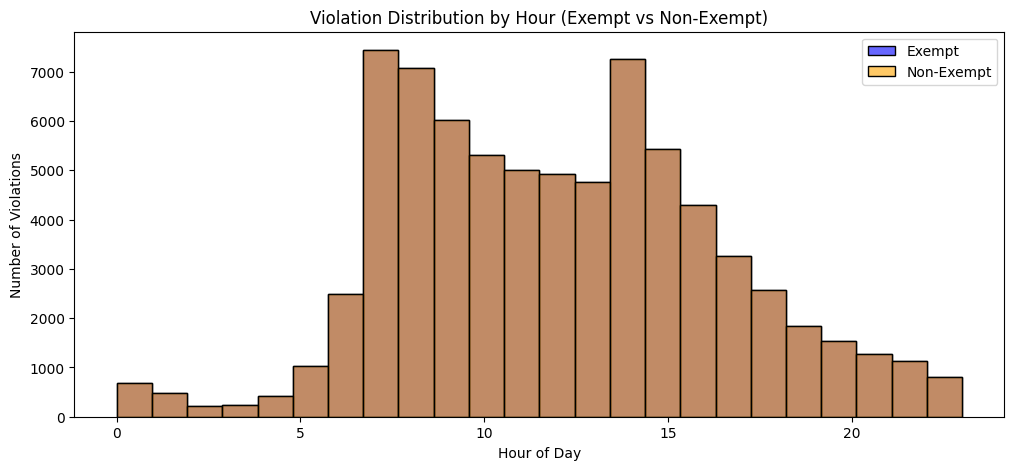

2025-09-22 18:46:42,703 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-09-22 18:46:42,775 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


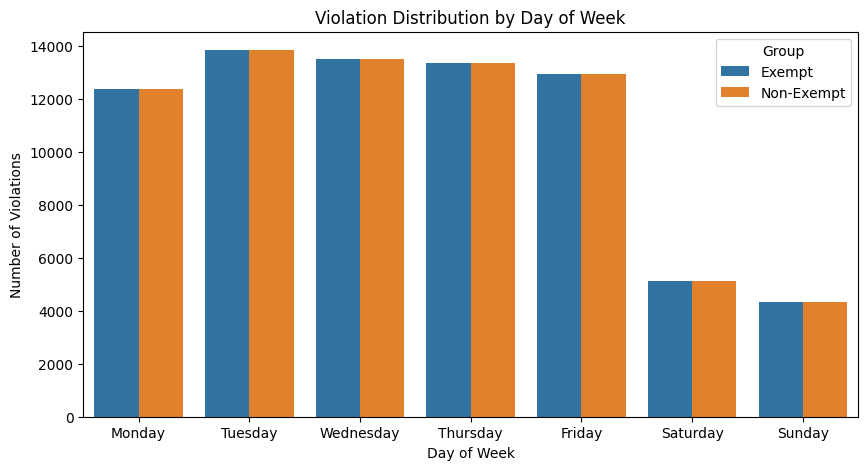

In [ ]:
# 1. Temporal Dimension (Time of Day / Day of Week)

ACE_CBD_exempt_violations_2024["violation_time"] = pd.to_datetime(ACE_CBD_exempt_violations_2024["first_occurrence"])
ACE_CBD_non_exempt_violations_2024["violation_time"] = pd.to_datetime(ACE_CBD_non_exempt_violations_2024["first_occurrence"])

for df in [ACE_CBD_exempt_violations_2024, ACE_CBD_non_exempt_violations_2024]:
    df["hour"] = df["violation_time"].dt.hour
    df["weekday"] = df["violation_time"].dt.day_name()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.histplot(ACE_CBD_exempt_violations_2024["hour"], bins=24, color="blue", label="Exempt", alpha=0.6, kde=False)
sns.histplot(ACE_CBD_non_exempt_violations_2024["hour"], bins=24, color="orange", label="Non-Exempt", alpha=0.6, kde=False)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Violations")
plt.title("Violation Distribution by Hour (Exempt vs Non-Exempt)")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=pd.concat([ACE_CBD_exempt_violations_2024.assign(group="Exempt"),
                              ACE_CBD_non_exempt_violations_2024.assign(group="Non-Exempt")]),
              x="weekday", hue="group", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Violation Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Violations")
plt.legend(title="Group")
plt.show()


# Interpretation:
# Peaks during weekday business hours for exempt vehicles indicate violations are business-driven.
# Non-exempt violations may be more spread or skewed to off-peak hours.

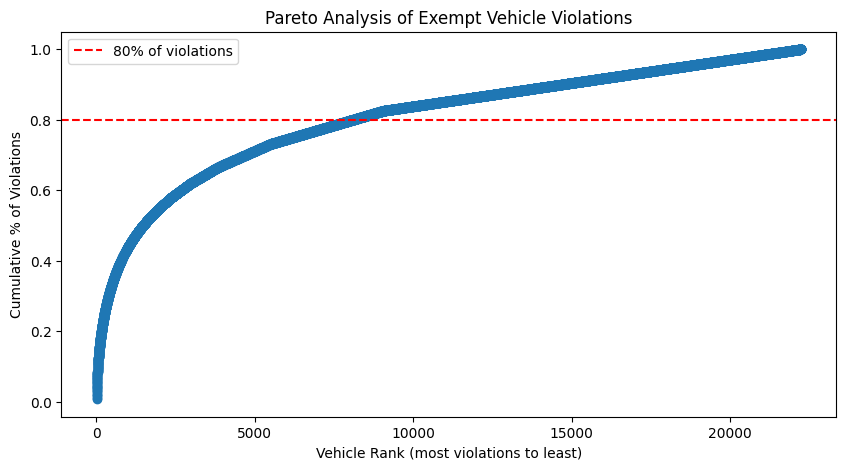

Number of super offenders (10+ violations): 1269


In [ ]:
# 2. Severity of Repeat Offending (Pareto / Super Offenders)

exempt_counts = ACE_CBD_exempt_violations_2024.groupby("vehicle_id")["violation_id"].count().sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.plot(range(1,len(exempt_counts)+1), exempt_counts.cumsum()/exempt_counts.sum(), marker='o')
plt.axhline(0.8, color="red", linestyle="--", label="80% of violations")
plt.xlabel("Vehicle Rank (most violations to least)")
plt.ylabel("Cumulative % of Violations")
plt.title("Pareto Analysis of Exempt Vehicle Violations")
plt.legend()
plt.show()

super_offenders = exempt_counts[exempt_counts >= 10]
print(f"Number of super offenders (10+ violations): {len(super_offenders)}")

# Interpretation:
# If a small number of vehicles account for most violations, targeted enforcement on those vehicles could drastically reduce congestion.

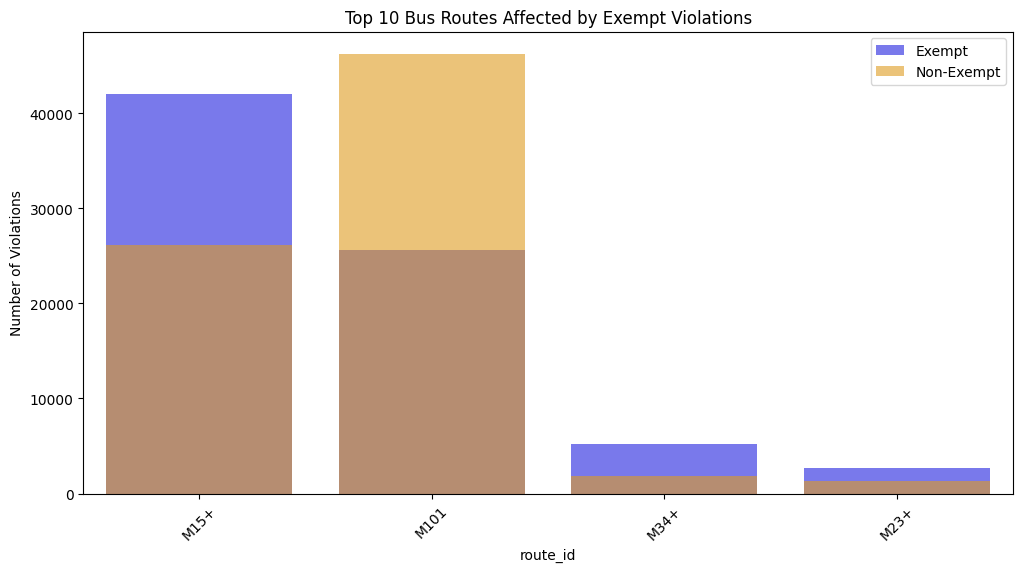

In [ ]:
# 3. Network Impact (Bus Routes)

exempt_route_counts = ACE_CBD_exempt_violations_2024.groupby("route_id")["violation_id"].count().sort_values(ascending=False)
non_exempt_route_counts = ACE_CBD_non_exempt_violations_2024.groupby("route_id")["violation_id"].count().sort_values(ascending=False)

top_routes = exempt_route_counts.head(10).index

plt.figure(figsize=(12,6))
sns.barplot(x=exempt_route_counts[top_routes].index, y=exempt_route_counts[top_routes].values, color="blue", alpha=0.6, label="Exempt")
sns.barplot(x=non_exempt_route_counts[top_routes].index, y=non_exempt_route_counts[top_routes].values, color="orange", alpha=0.6, label="Non-Exempt")
plt.xticks(rotation=45)
plt.ylabel("Number of Violations")
plt.title("Top 10 Bus Routes Affected by Exempt Violations")
plt.legend()
plt.show()

# Interpretation:
# Shows which routes are disrupted most by exempt violations. Useful for DOT prioritization.

C:\Users\aisha\AppData\Local\Temp\ipykernel_16784\2763420398.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="Set2")


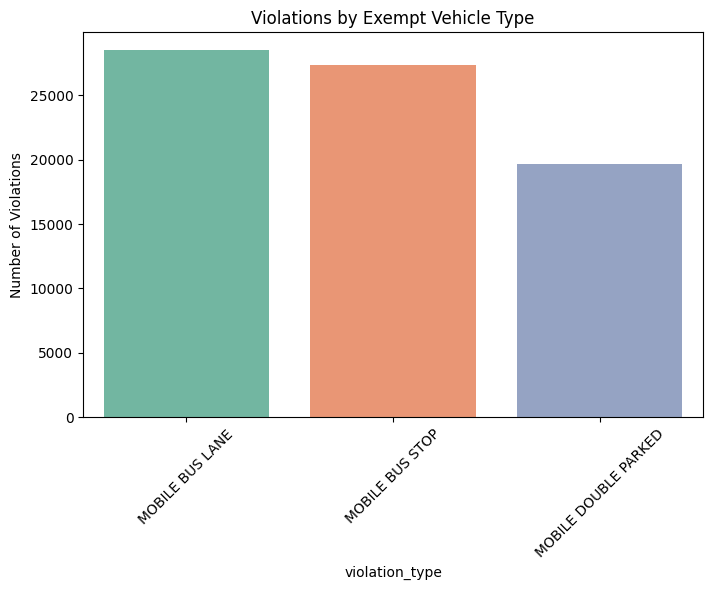

In [ ]:
# 4. Comparison Within Exempt Categories

type_counts = ACE_CBD_exempt_violations_2024.groupby("violation_type")["violation_id"].count().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="Set2")
plt.ylabel("Number of Violations")
plt.title("Violations by Exempt Vehicle Type")
plt.xticks(rotation=45)
plt.show()

# Interpretation:
# Identify which exempt categories are most likely to be repeat offenders.

2025-09-22 18:56:20,640 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-09-22 18:56:20,679 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


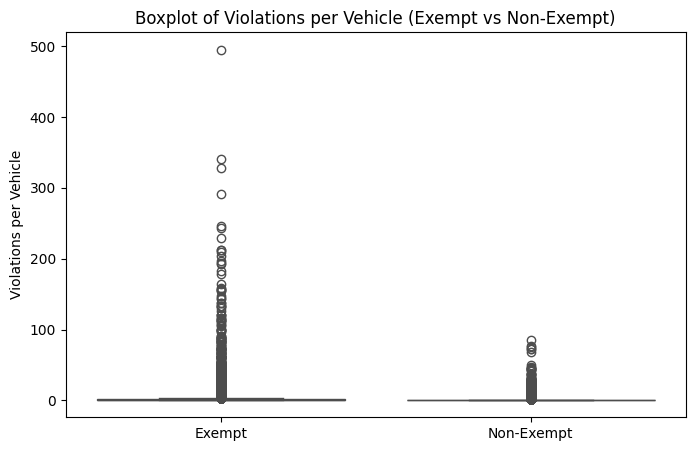

In [65]:
# 5. Visual Storytelling Enhancements

plt.figure(figsize=(8,5))
sns.boxplot(data=[exempt_counts.values, ACE_CBD_non_exempt_violations_2024.groupby("vehicle_id")["violation_id"].count().values],
            palette=["blue","orange"])
plt.xticks([0,1], ["Exempt","Non-Exempt"])
plt.ylabel("Violations per Vehicle")
plt.title("Boxplot of Violations per Vehicle (Exempt vs Non-Exempt)")
plt.show()
